# Imports

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import MNIST

from helper_plot import plot_images, plot_generated_images
from helper_train import train_gan

# Config

In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 256
NUM_EPOCHS = 50
LEARNING_RATE_GENERATOR = 0.0002
LEARNING_RATE_DISCRIMINATOR = 0.0002

# Dataset

In [3]:
data_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5)),
    ])

mnist_dataset = MNIST('../Dataset', train = True, transform = data_transforms)
train_loader = DataLoader(mnist_dataset, batch_size = BATCH_SIZE, shuffle = True)
images, labels = next(iter(train_loader))
print(torch.min(images), torch.max(images))


tensor(-1.) tensor(1.)


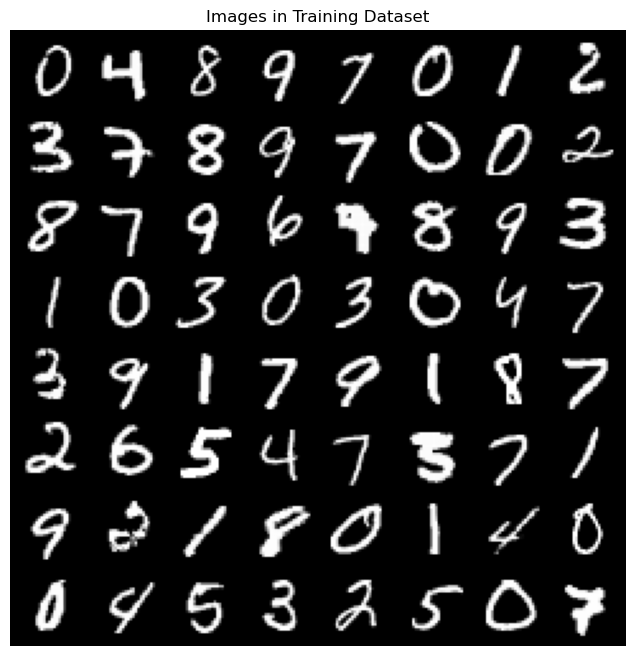

In [4]:
plot_images(train_loader)

# GAN

In [7]:
class GAN(nn.Module):
    def __init__(self, latent_dim = 100):
        super().__init__()

        self.generator = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 784),
            nn.Tanh()
        )


        self.discriminator = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 1), #outputs logits
            # nn.Sigmoid()
        )

    def generator_forward(self, z): # z has dimension NCHW
        z = torch.flatten(z, start_dim = 1) 
        img = self.generator(z)
        img = img.view(z.size(0),1, 28, 28)
        return img

    def discriminator_forward(self, img):
        logits = self.discriminator(img)
        return logits

In [8]:
model = GAN().to(DEVICE)
optimizer_generator = torch.optim.Adam(model.generator.parameters(), 
                                        lr = LEARNING_RATE_GENERATOR,
                                        betas=(0.5, 0.999))

optimizer_discriminator = torch.optim.Adam(model.discriminator.parameters(),
                                         lr = LEARNING_RATE_DISCRIMINATOR,
                                         betas=(0.5, 0.999))

# Training

In [9]:
log_dict = train_gan(model, 
                    train_loader, 
                    optimizer_generator, 
                    optimizer_discriminator, 
                    NUM_EPOCHS, 100)

Epoch [1/50]                     Loss D: 0.7106, loss G: 0.6675
Epoch [1/50]                     Loss D: 0.4923, loss G: 0.5953
Epoch [1/50]                     Loss D: 0.5506, loss G: 0.6296
Epoch [2/50]                     Loss D: 0.5448, loss G: 0.6660
Epoch [2/50]                     Loss D: 0.4671, loss G: 0.8328
Epoch [2/50]                     Loss D: 0.3625, loss G: 1.0471
Epoch [3/50]                     Loss D: 0.3614, loss G: 1.1063
Epoch [3/50]                     Loss D: 0.4176, loss G: 0.9684
Epoch [3/50]                     Loss D: 0.4062, loss G: 1.0540
Epoch [4/50]                     Loss D: 0.4289, loss G: 1.0106
Epoch [4/50]                     Loss D: 0.4097, loss G: 1.1278
Epoch [4/50]                     Loss D: 0.4024, loss G: 1.0743
Epoch [5/50]                     Loss D: 0.4124, loss G: 1.1226
Epoch [5/50]                     Loss D: 0.4144, loss G: 1.0047
Epoch [5/50]                     Loss D: 0.4190, loss G: 1.2689
Epoch [6/50]                     Loss D:

# Visualization

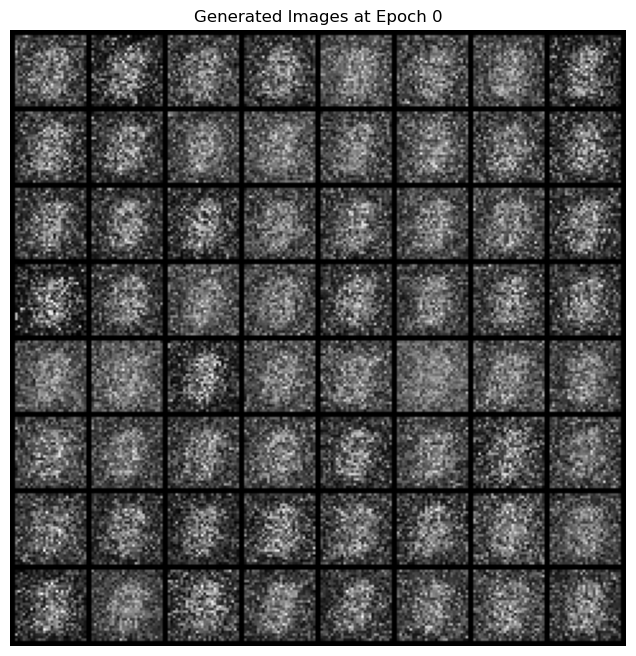

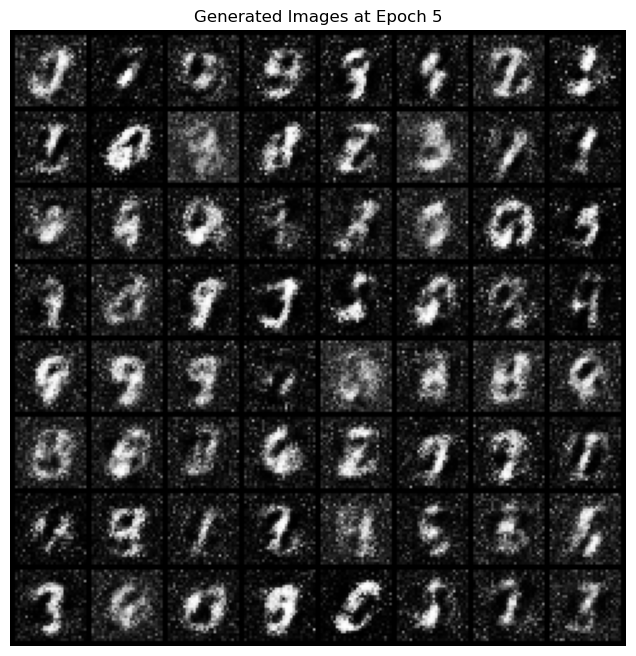

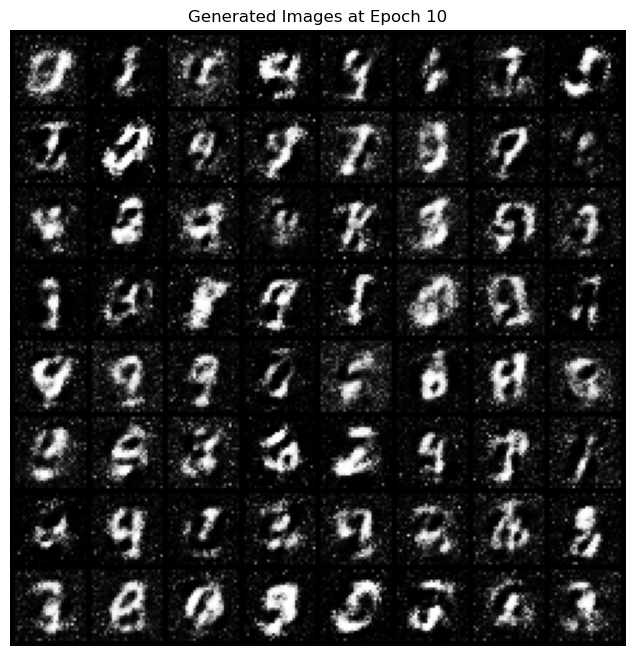

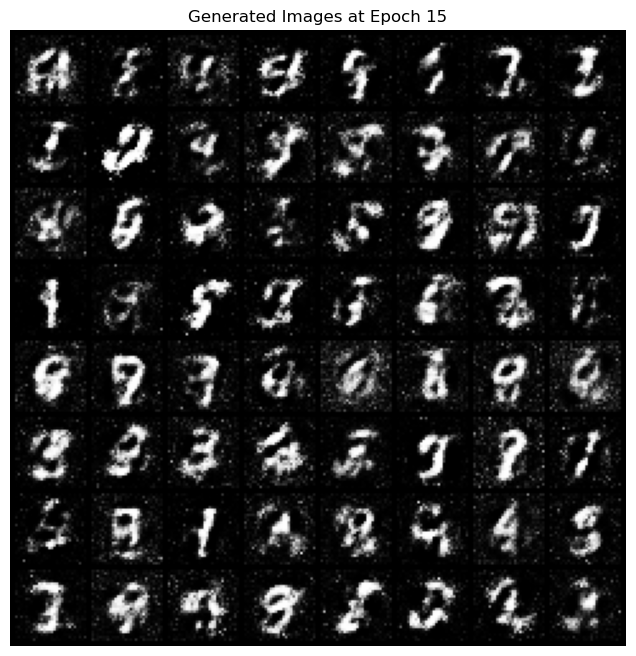

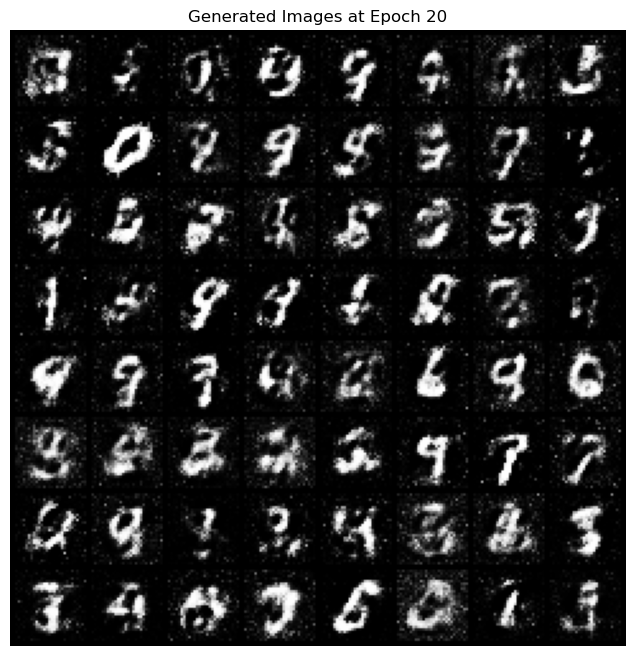

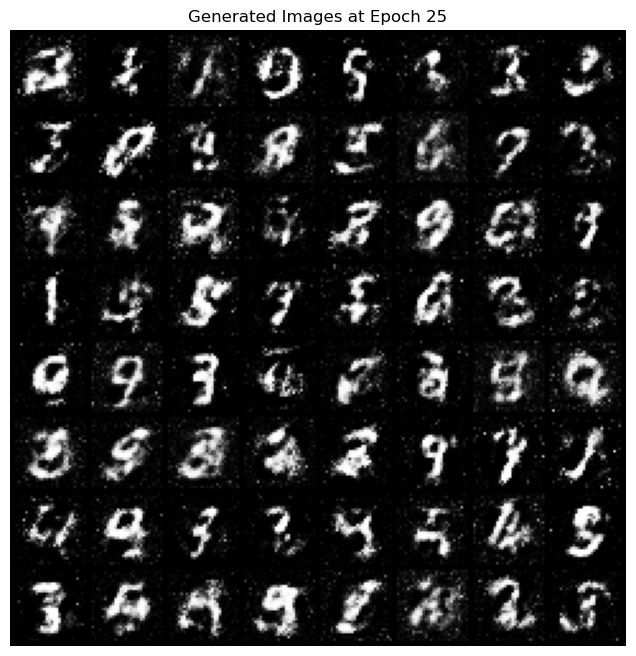

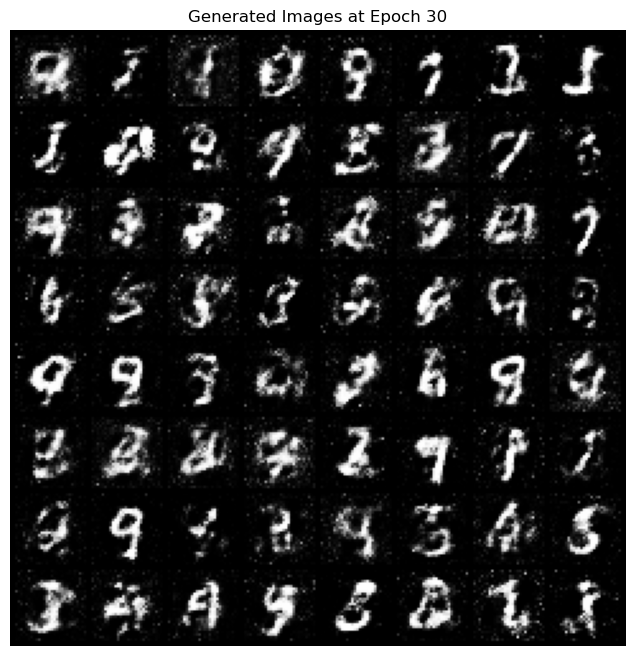

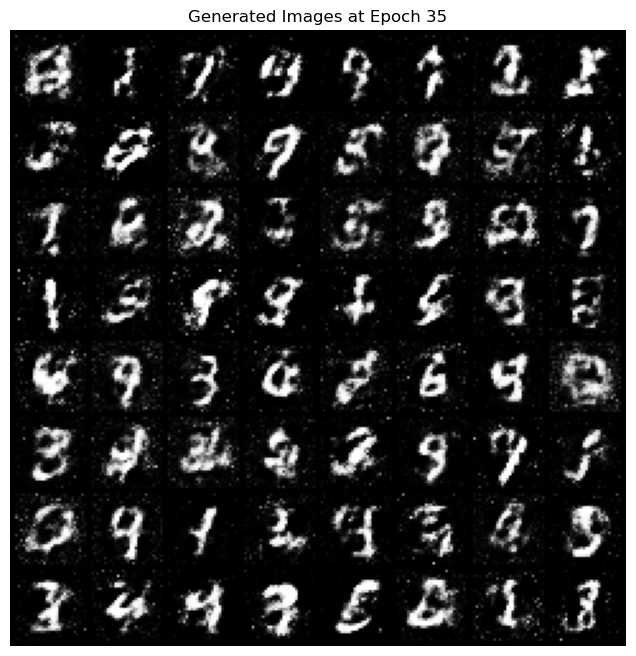

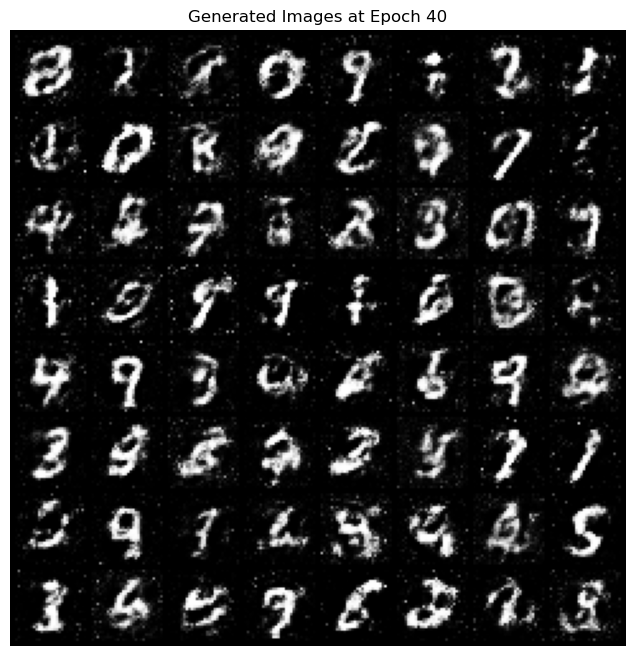

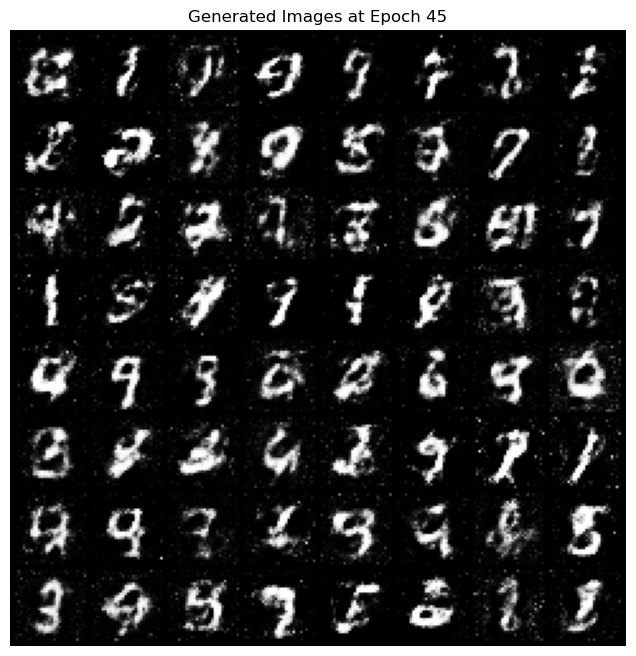

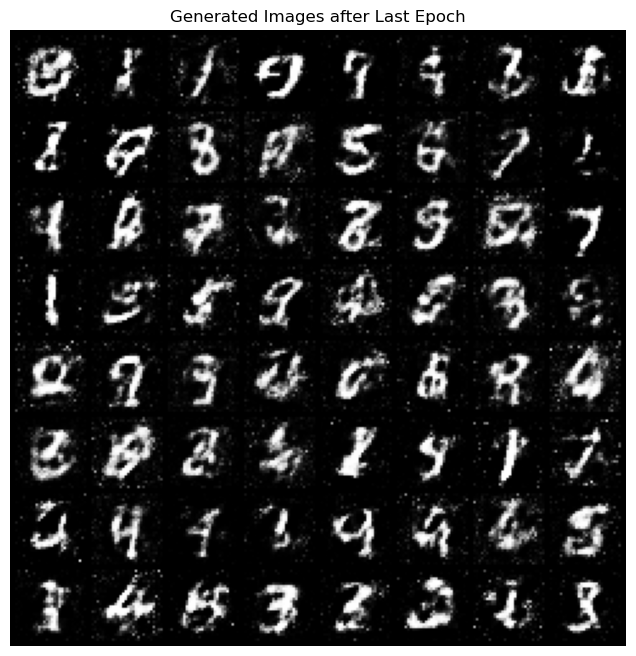

In [10]:
plot_generated_images(NUM_EPOCHS, log_dict)
